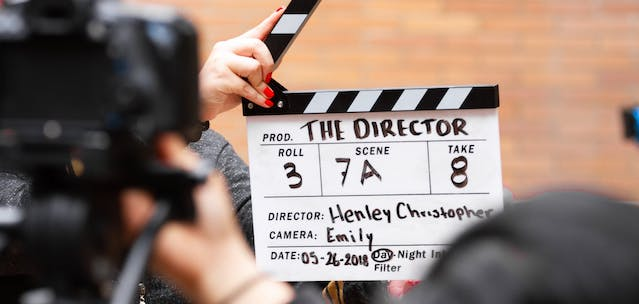

# UNLOCKING SUCCESS IN THE WORLD OF ENTERTAINMENT: Microsoft’s Movie Studio

**Author:** Victorine Imbuhila

# Overview
This project analyzes movie datasets for Microsoft, a multinational technology company known for developing software, hardware and cloud-based services. Microsoft has been a trendsetter in technology for nearly half a century. We are renowned for our innovation, commitment to quality and global impact on the digital landscape. From operating systems to cloud computing, our expertise has touched every corner of the tech universe.
In an era where technology and entertainment intersect to define the boundaries of creativity and engagement, Microsoft is embarking on a remarkable journey. Our focus is to establish a great presence in the world of original video content creation. We leverage the power of data to derive insights that will provide a path forward for Microsoft’s new movie studio.

# Business Problem
Original video content creation has emerged as a cultural and economic force globally. Microsoft recognizes the potential of this domain and that is why we are charting a course into the world of entertainment. Microsoft have decided to create a new movie studio. My task is to explore the films that are performing best at the Box Office. I then use these findings to generate valuable insights that the head of the new movie studio can use to decide which type of films to create. My aim is to equip the new studio with the knowledge and strategies it needs to thrive in the competitive entertainment industry.

# Data Understanding
The data contains movie datasets from [Box Office Mojo](https://www.boxofficemojo.com/), [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [TheMovieDB](https://www.themoviedb.org/) and [The Numbers](https://www.the-numbers.com/). The data files provide details about the movie titles, release year, runtime, genres, production budget, languages as well as several other attributes of the movies.

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd

We query the imdb data to get the movie_basics and movie_ratings tables.

In [2]:
# Create a connection to the database
conn = sqlite3.connect("zippedData/im.db")

In [3]:
# Query the database to select the table names
table_names = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
pd.read_sql(table_names, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Select all columns from the movie basics table
movie_basics_query = """SELECT *
                          FROM movie_basics;"""
pd.read_sql(movie_basics_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
# Select all the columns from the movie basics where the runtime is null
runtime_null_query = """SELECT *
                         FROM movie_basics
                         WHERE runtime_minutes IS NULL; """
pd.read_sql(runtime_null_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,None,"Comedy,Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,None,"Horror,Thriller"
2,tt0139613,O Silêncio,O Silêncio,2012,None,"Documentary,History"
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,None,None
4,tt0250404,Godfather,Godfather,2012,None,"Crime,Drama"
...,...,...,...,...,...,...
31734,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,None,Family
31735,tt9916428,The Secret of China,The Secret of China,2019,None,"Adventure,History,War"
31736,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,None,Documentary
31737,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,None,Comedy


In [6]:
# Select all columns from the movie ratings table
movie_ratings_query = """SELECT *
                           FROM movie_ratings;"""
pd.read_sql(movie_ratings_query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
# Join the movie basics and movie ratings tables
merge_query = """SELECT *
                   FROM movie_basics
                   JOIN movie_ratings
                     USING(movie_id); """
merged_table = pd.read_sql(merge_query, conn)
merged_table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
# Convert the merged table to a dataframe and store it as a csv file
df = pd.DataFrame(merged_table)

df.to_csv("movie_basics_and_ratings.csv", index = False)

In [9]:
# Read the csv file into a dataframe
movie_basics_ratings = pd.read_csv("movie_basics_and_ratings.csv")

In [10]:
# Inspect the first five rows of the dataframe
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [11]:
# Create a function for getting all the information about the dataframe
def get_dataframe_summary(df):
    shape = df.shape
    info = df.info()
    description = df.describe()
    return shape, description

In [12]:
# Use the function to get information about the dataframe
get_dataframe_summary(movie_basics_ratings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


((73856, 8),
          start_year  runtime_minutes  averagerating      numvotes
 count  73856.000000     66236.000000   73856.000000  7.385600e+04
 mean    2014.276132        94.654040       6.332729  3.523662e+03
 std        2.614807       208.574111       1.474978  3.029402e+04
 min     2010.000000         3.000000       1.000000  5.000000e+00
 25%     2012.000000        81.000000       5.500000  1.400000e+01
 50%     2014.000000        91.000000       6.500000  4.900000e+01
 75%     2016.000000       104.000000       7.400000  2.820000e+02
 max     2019.000000     51420.000000      10.000000  1.841066e+06)

In [13]:
# Check the columns with null values
movie_basics_ratings.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [14]:
# Drop the rows with null values
movie_basics_ratings.dropna(inplace = True)

In [15]:
# Drop the unnecessary columns 
movie_basics_ratings.drop("original_title", axis=1, inplace=True)
movie_basics_ratings.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [16]:
# Check for duplicates
movie_basics_ratings["primary_title"].value_counts()

The Return                    10
Lucky                          9
Broken                         8
Together                       8
Homecoming                     8
                              ..
Exit Thread                    1
Praho, má lásko                1
Craigslist Joe                 1
A Little Long in the Tooth     1
Yolki 3                        1
Name: primary_title, Length: 62444, dtype: int64

In [17]:
# Drop duplicates inplace
movie_basics_ratings.drop_duplicates(subset = "primary_title", inplace=True)

In [18]:
# Check if it has worked
movie_basics_ratings["primary_title"].value_counts()

The Trace We Leave Behind    1
Ann Richards' Texas          1
Ghinionistul                 1
Found Footage                1
Valedictorian                1
                            ..
Vautrin                      1
Marko Friday Night           1
Self Induced Nightmares      1
Highway 91                   1
Yolki 3                      1
Name: primary_title, Length: 62444, dtype: int64

In [19]:
# Read in the movie_budgets.csv file as a dataframe and inspect the first five values
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")
movie_budgets.drop("id", axis=1, inplace=True)
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
# Get the movie_budgets dataframe information
get_dataframe_summary(movie_budgets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


((5782, 5),
         release_date      movie production_budget domestic_gross  \
 count           5782       5782              5782           5782   
 unique          2418       5698               509           5164   
 top     Dec 31, 2014  King Kong       $20,000,000             $0   
 freq              24          3               231            548   
 
        worldwide_gross  
 count             5782  
 unique            5356  
 top                 $0  
 freq               367  )

# Data Preparation
- Merge the data and clean the datasets to get the final dataframe that will be used in the analysis.
- Drop the columns that we do not need.
- Delete te rows with missing values.

In [21]:
# Merge the dataframes on the common key
merged_movies_df = pd.merge(movie_basics_ratings, movie_budgets, left_on="primary_title", right_on="movie", how="inner")
merged_movies_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
3,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
4,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"


In [22]:
# Drop the unnecessary rows
merged_movies_df.drop(["movie", "numvotes", "start_year", "domestic_gross"], axis=1, inplace=True)
merged_movies_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,"Dec 31, 2012","$45,000,000","$73,706"
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,"Mar 22, 2013","$25,000,000","$9,313,302"
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013","$91,000,000","$187,861,183"
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,"Sep 19, 2014","$28,000,000","$62,108,587"
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,"Jun 12, 2015","$215,000,000","$1,648,854,864"


In [23]:
# Check for duplicates
merged_movies_df["primary_title"].value_counts()

Home                3
Halloween           3
The Great Gatsby    2
The Gift            2
The Gambler         2
                   ..
Second Act          1
Driven              1
The Interview       1
Down to Earth       1
Attack the Block    1
Name: primary_title, Length: 2092, dtype: int64

In [24]:
# Drop duplicates inplace
merged_movies_df.drop_duplicates(subset = "primary_title", inplace=True)

In [25]:
# Check if it has worked
movie_basics_ratings["primary_title"].value_counts()

The Trace We Leave Behind    1
Ann Richards' Texas          1
Ghinionistul                 1
Found Footage                1
Valedictorian                1
                            ..
Vautrin                      1
Marko Friday Night           1
Self Induced Nightmares      1
Highway 91                   1
Yolki 3                      1
Name: primary_title, Length: 62444, dtype: int64

In [26]:
# Get all the information about the dataframe
get_dataframe_summary(merged_movies_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2092 non-null   object 
 1   primary_title      2092 non-null   object 
 2   runtime_minutes    2092 non-null   float64
 3   genres             2092 non-null   object 
 4   averagerating      2092 non-null   float64
 5   release_date       2092 non-null   object 
 6   production_budget  2092 non-null   object 
 7   worldwide_gross    2092 non-null   object 
dtypes: float64(2), object(6)
memory usage: 147.1+ KB


((2092, 8),
        runtime_minutes  averagerating
 count      2092.000000    2092.000000
 mean        103.979924       6.232744
 std          18.837816       1.132598
 min           5.000000       1.600000
 25%          91.000000       5.600000
 50%         102.000000       6.300000
 75%         114.000000       7.000000
 max         180.000000       9.200000)

In [27]:
# Convert the columns to the correct data types
# Convert release date to datetime
merged_movies_df["release_date"] = pd.to_datetime(merged_movies_df["release_date"])

# Convert production budget and worldwide gross to float
merged_movies_df["production_budget"] = merged_movies_df["production_budget"].str.replace(",", "").str.replace("$", "").astype(float)
merged_movies_df["worldwide_gross"] = merged_movies_df["worldwide_gross"].str.replace(",", "").str.replace("$", "").astype(float)

# Check the data types
merged_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2092 non-null   object        
 1   primary_title      2092 non-null   object        
 2   runtime_minutes    2092 non-null   float64       
 3   genres             2092 non-null   object        
 4   averagerating      2092 non-null   float64       
 5   release_date       2092 non-null   datetime64[ns]
 6   production_budget  2092 non-null   float64       
 7   worldwide_gross    2092 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 147.1+ KB


In [28]:
# Inspect the final dataframe
merged_movies_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09


# Data Analysis
The objectives of this analysis are:
1. To investigate how the production budget impacts a movie’s performance at the global box office. This will cover a wide range of budgets allowing us to draw insights across budget ranges.
2.  To investigate the relationship between seasonal trends and box office performance. We seek to understand whether certain release months or seasons influence a movie’s worldwide revenue.
3.  To determine whether the duration of a movie plays a role in its box office success.Examining successful movies with varying runtimes will help us establish whether there exists an ideal duration that maximizes worldwide revenue.

In [29]:
# Import the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Production Budget and Box Office Success
## Objective
- How does production budget influence the box office performance of the movie?

In [30]:
# Original dataframe
merged_movies_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09


In [31]:
# Preview the dataset
movies_budget_df = merged_movies_df.copy()
movies_budget_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09


In [32]:
# Calculate the correlation between production budget and worldwide gross
corr = movies_budget_df["production_budget"].corr(movies_budget_df["worldwide_gross"])
print(f"The correlation coefficient between production budget and worldwide gross is {corr}")

The correlation coefficient between production budget and worldwide gross is 0.7918200168785178


The correlation value indicates that there is a strong positive correlation between the production budget of a movie and the total revenue generated by the movie. Higher budgets are associated with higher earnings.

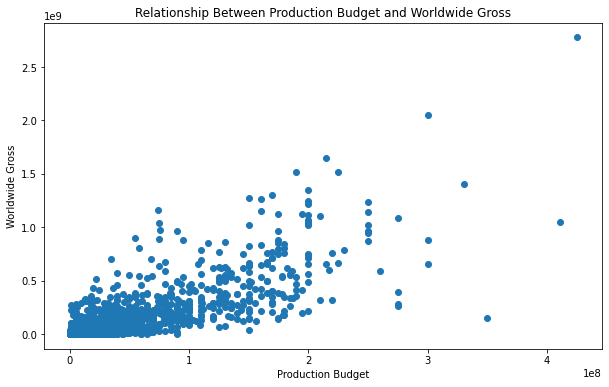

In [33]:
# Create a scatter plot showing relationship between production budget and worldwide gross
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(movies_budget_df["production_budget"], movies_budget_df["worldwide_gross"])

# Customize title and axes labels
ax.set_title("Relationship Between Production Budget and Worldwide Gross")
ax.set_xlabel("Production Budget")
ax.set_ylabel("Worldwide Gross");

# Save the figure
plt.savefig("images/Relationship Between Production Budget and Worldwide Gross.png")

From the scatter plot above we can see that there are a lot of movies with lower budget levels that did not perform well in terms of the revenue generated worldwide. However, we also note that as production budget increases, the movies tend to earn more. This aligns with the positive correlation.

# 2. Seasonal Box Office Trends
## Objectives
- How are movie releases affected by seasonal trends?
- Do specific release times lead to higher box office success?

In [34]:
# Original dataframe
merged_movies_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09


In [35]:
# Make a copy of original df that we can work with
seasonal_trends_df = merged_movies_df.copy()

In [36]:
# Extract the release year and month from the release date
seasonal_trends_df["release_year"] = seasonal_trends_df["release_date"].dt.year

seasonal_trends_df["release_month"] = seasonal_trends_df["release_date"].dt.month

seasonal_trends_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross,release_year,release_month
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04,2012,12
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06,2013,3
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08,2013,12
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07,2014,9
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09,2015,6


In [37]:
# Define a function to group the release months into the different seasons
def group_seasons(month):
    if month >= 3 and month <= 5:
        return "Spring"
    elif month >= 6 and month <= 8:
        return "Summer"
    elif month >= 9 and month <= 11:
        return "Autumn"
    else:
        return "Winter"

# Apply our function to seasonal trends dataframe
seasonal_trends_df["release_season"] = seasonal_trends_df["release_month"].apply(group_seasons)

In [38]:
# Check that our function worked
seasonal_trends_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross,release_year,release_month,release_season
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04,2012,12,Winter
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06,2013,3,Spring
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08,2013,12,Winter
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07,2014,9,Autumn
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09,2015,6,Summer


We can inspect our data to see the total number of movies produced in each season and visualize that using a bar plot.

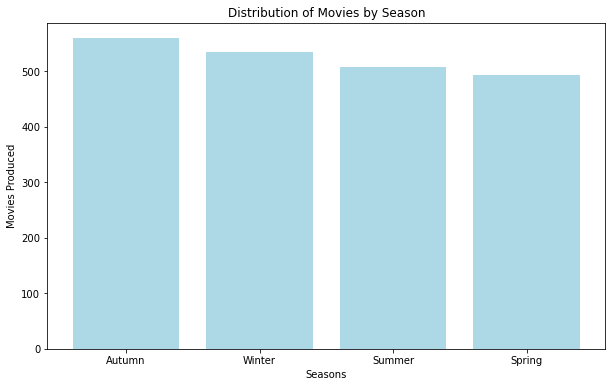

In [39]:
# Get the number of movies produced in each season
value_counts = seasonal_trends_df["release_season"].value_counts()

# Visualize the total number of movies produced per season
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(value_counts.index, value_counts.values, color="lightblue")

# Customize title and axes labels
ax.set_title("Distribution of Movies by Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Movies Produced");

# Save the figure
plt.savefig("images/Distribution of Movies by Season,png")

From our bar plot we can see that most of the movies in our dataset were produced during Autumn while Spring had the least number of movies produced.

We can compare the relationship between the movies produced in each season and the worlwide gross. We find the total box office worldwide gross per season by grouping the data by the different seasons and finding the average gross for each season.

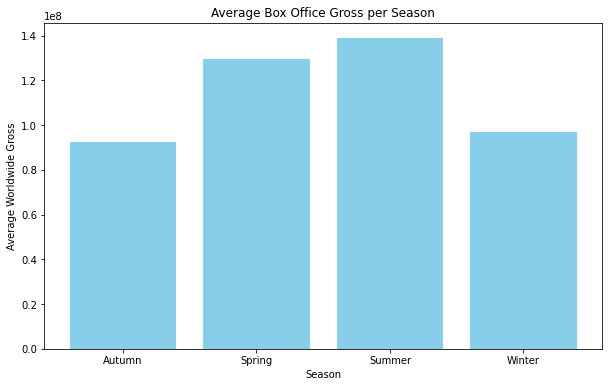

In [40]:
# Group the data by season and calculate average box office gross
seasonal_performance = seasonal_trends_df.groupby('release_season')['worldwide_gross'].mean().reset_index()

# Create a bar plot to visualize the average box office gross per season
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(seasonal_performance['release_season'], seasonal_performance['worldwide_gross'], color='skyblue')

# Customize title and axes labels
ax.set_title('Average Box Office Gross per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Average Worldwide Gross');

# Save the figure
plt.savefig("images/Average Box Office Gross per Season.png")

From the bar plot above we can see that movies released during Summer season returned the highest average worldwide box office gross. Movies released during Autumn had the least generated worldwide gross.

# 3. Movie Duration and Box Office Earnings
## Objective
- How does movie duration affect box office earnings?

In [41]:
# Make a copy of the dataframe that you can work with
movies_runtime_df = merged_movies_df.copy()
movies_runtime_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000.0,7.370600e+04
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000.0,9.313302e+06
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000.0,6.210859e+07
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,2015-06-12,215000000.0,1.648855e+09


In [42]:
# Calculate the correlation between runtime and worldwide gross
corr = movies_runtime_df["runtime_minutes"].corr(movies_runtime_df["worldwide_gross"])
print(f"The correlation coefficient between movie runtime and worldwide gross is {corr}")

The correlation coefficient between movie runtime and worldwide gross is 0.27816575177613734


The correlation value suggests that there is a weak correlation. The duration of a movie does not strongly influence its worldwide gross earnings.

We can define a function for creating scatter plots since we will be using it for multiple visualizations.

In [43]:
# Define create_scatter_plot function for creating scatter plots
def create_scatter_plot(ax, x_data, y_data, title, x_label, y_label):
    """
    This function takes in six parameters:
       ax: The axis on which to create the plot,
       x_data: the x-axis data,
       y_data: the y-axis data,
       title: the title of the plot,
       x_label: the label for the x-axis,
       y_label:the label for the y-axis
    and returns a scatter plot for the provided data.
    """
    ax.scatter(x_data, y_data, label=title, color="green", alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend();

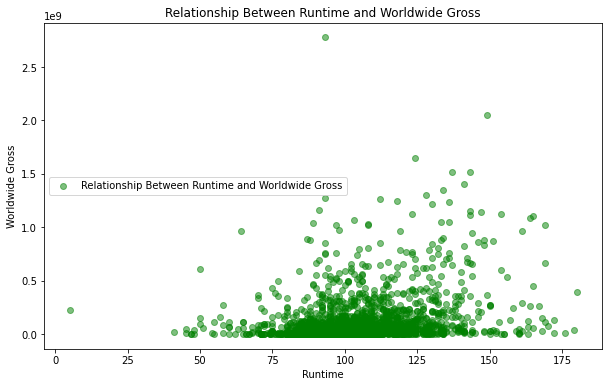

In [44]:
# Scatter plot showing relationship between runtime in minutes and worldwide gross
fig, ax = plt.subplots(figsize = (10, 6))
create_scatter_plot(ax, 
                    movies_runtime_df["runtime_minutes"],
                    movies_runtime_df["worldwide_gross"], 
                    "Relationship Between Runtime and Worldwide Gross",
                    "Runtime",
                    "Worldwide Gross")

# Save the figure
plt.savefig("images/Relationship Between Runtime and Worldwide Gross.png")

From the scatter plot above we can see that most films have a moderate runtime and some of them achieve higher box office earnings. There are a few outliers with very high worldwide gross values.

We can investigate this relationship further by visualizing the relationship between the runtime for each category of the movies and their worldwide gross. We create a function to group the movies into short, long and medium based on the duration of the movies in our dataset.

In [45]:
# Find the longest and shortest film in our dataset
print(f"The longest film is {movies_runtime_df['runtime_minutes'].max()} minutes")

print(f"The shortest film is {movies_runtime_df['runtime_minutes'].min()} minutes")

The longest film is 180.0 minutes
The shortest film is 5.0 minutes


In [46]:
# Create a function movie_duration to categorize our movies based on the duration of the longest and shortest one
def movie_duration(runtime):
    if 5 <= runtime <= 60:
        return "short"
    elif 61 <= runtime <= 120:
        return "medium"
    else:
        return "long"

movies_runtime_df["runtime_category"] = movies_runtime_df["runtime_minutes"].apply(movie_duration)

# check that our function has worked
movies_runtime_df["runtime_category"].unique()

array(['medium', 'long', 'short'], dtype=object)

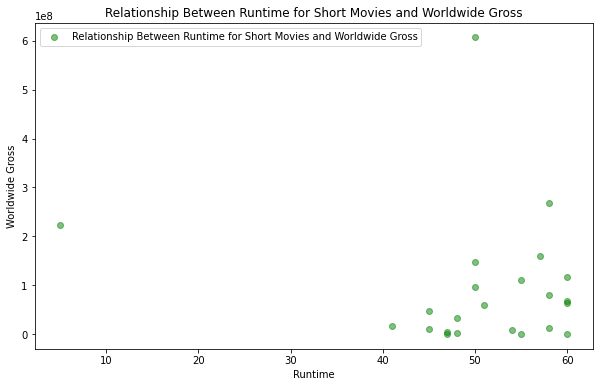

In [47]:
# subset the movies dataframe to get the short films
short_movies = movies_runtime_df[movies_runtime_df["runtime_category"] == "short"]

# Scatter plot showing relationship between runtime in minutes for short movies and worldwide gross
fig, ax = plt.subplots(figsize = (10, 6))
create_scatter_plot(ax, 
                    short_movies["runtime_minutes"],
                    short_movies["worldwide_gross"], 
                    "Relationship Between Runtime for Short Movies and Worldwide Gross",
                    "Runtime",
                    "Worldwide Gross")

# Save the figure
plt.savefig("images/Relationship Between Runtime for Short Movies and Worldwide Gross.png")

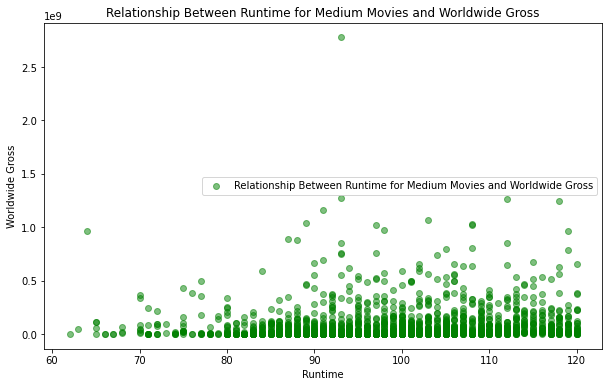

In [48]:
# subset the movies dataframe to get the medium films
medium_movies = movies_runtime_df[movies_runtime_df["runtime_category"] == "medium"]

# Scatter plot showing relationship between runtime in minutes for medium movies and worldwide gross
fig, ax = plt.subplots(figsize = (10, 6))
create_scatter_plot(ax, 
                    medium_movies["runtime_minutes"],
                    medium_movies["worldwide_gross"], 
                    "Relationship Between Runtime for Medium Movies and Worldwide Gross",
                    "Runtime",
                    "Worldwide Gross")

# Save the figure
plt.savefig("images/Relationship Between Runtime for Medium Movies and Worldwide Gross.png")

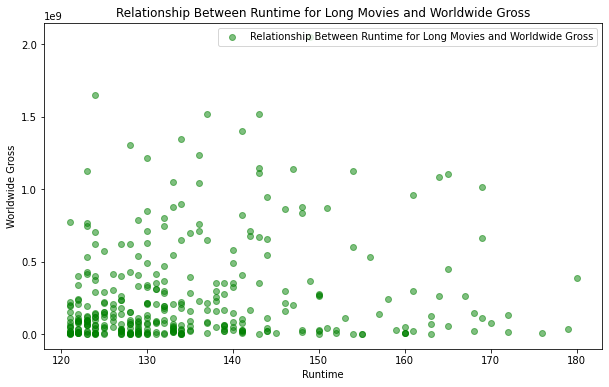

In [49]:
# subset the movies dataframe to get the long films
long_movies = movies_runtime_df[movies_runtime_df["runtime_category"] == "long"]

# Scatter plot showing relationship between runtime in minutes for long movies and worldwide gross
fig, ax = plt.subplots(figsize = (10, 6))
create_scatter_plot(ax, 
                    long_movies["runtime_minutes"],
                    long_movies["worldwide_gross"], 
                    "Relationship Between Runtime for Long Movies and Worldwide Gross",
                    "Runtime",
                    "Worldwide Gross")

# Save the figure
plt.savefig("images/Relationship Between Runtime for Long Movies and Worldwide Gross.png")

From our plots we can see that there is a relatively weak relationship between the duration of the movie and the worldwide gross earnings, which relates to the correlation value we obtained.

#  Business Recommendations

This analysis led to three recommendations for Microsoft to consider when getting into the movie business:
- **Allocate sufficient resources to production budgets.** Investing in production is important in order to maximize returns from the films. Producing high-quality content plays a significant role in the success of the movies.
- **Consider seasonal strategy.** Given that movies released during Summer tend to have a higher average worldwide gross, consider allocating more resources towards the Summer season when the audiences are more active and engaged.
- **Diversity in runtimes.** Consider producing a mix of short, medium and long films to cater to various target audiences.This allows for broader audience appeal and accommodates different viewer preferences.

# Next Steps
Further analyses that could yield additional insights in order to make an informed decision:
- **Analyze how genre can affect the performance of the movies.**  Investigate whether there are differences in reception across the genres and how this affects box office performance.Are there emerging genres gaining popularity?
- **Predicting audience engagement.** This model could analyze social media trends, audience sentiment and audience discussions to predict the level of audience engagement and interest in a movie before its release.
- **Market research.** Identify trends, emerging opportunities and audience demographics to understand the state of the movie industry. Analyze the competition to find key players and gaps that the business can fill.